In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [36]:
dataset = pd.read_csv('train.csv')
y_train = dataset.iloc[:,3:4].values
X_train = dataset.iloc[:,1:-2].values
y_train

array([[208500],
       [181500],
       [223500],
       ...,
       [266500],
       [142125],
       [147500]], dtype=int64)

In [37]:
print(len(y_train))
print(len(X_train))

1460
1460


In [38]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy='mean')
imputer.fit(X_train[:,:])
X_train[:,:] = imputer.transform(X_train[:,:])

In [39]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)

In [41]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X_train,y_train)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

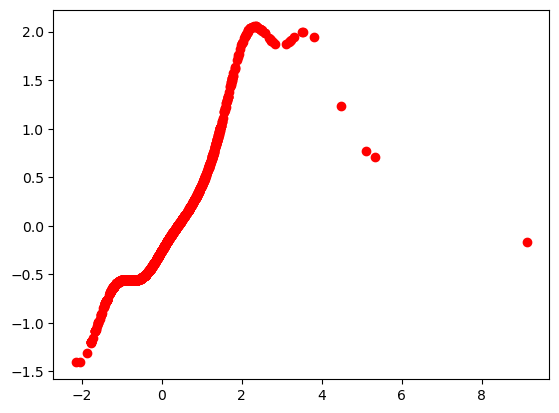

In [42]:
plt.scatter(X_train,regressor.predict(X_train),color='red')

In [43]:
y_pred = sc_y.inverse_transform([regressor.predict(sc_X.transform(X_train))])

In [44]:
print(y_pred)

[[149019.48502785 148711.96816296 148971.05138857 ... 148768.06499783
  148851.4135607  148716.51733251]]


In [45]:
data = pd.read_csv('test.csv')
X = data.iloc[:,1:-1].values
imputer = SimpleImputer(missing_values = np.nan, strategy='mean')
imputer.fit(X[:,:])
X[:,:] = imputer.transform(X[:,:])

In [46]:
X_test = data.iloc[:,1:-1].values
print(X_test)

[[ 896]
 [1329]
 [ 928]
 ...
 [1224]
 [ 970]
 [ 996]]


In [51]:
y_pred = sc_y.inverse_transform([regressor.predict(sc_X.transform(X_test))])

In [52]:
ans = pd.DataFrame({'Id':data['Id'] , 'SalePrice':y_pred[0]})

In [53]:
ans.to_csv('sample_submission.csv')

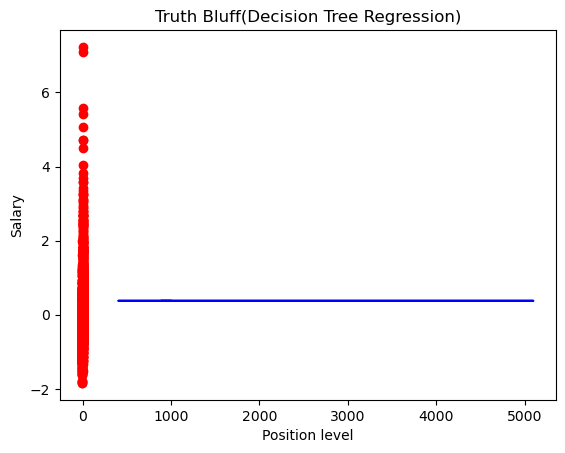

In [54]:
plt.scatter(X_train,y_train,color='red')
plt.plot(X,regressor.predict(X),color='blue')
plt.title('Truth Bluff(Decision Tree Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()